In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

## Data Upload

In [6]:
sug_core_fes.columns

Index(['Скважина', 'Пласт', 'Номер образца', 'Глубина кровли интерв',
       'Глубина подошвы интерв', 'Вынос', ' Место взятия',
       ' Глубина с привязкой', ' Пористость по керос', 'Пористость по воде',
       ' Проницаемость, мД', ' Остат. водонас.', 'Остат. нефтенас',
       ' Плотность (объемная)', 'Карбонатность', 'Глинистость',
       'Литологическое описание  '],
      dtype='object')

In [7]:
sug_core_fes_init = pd.read_csv('fes.csv', encoding = 'cp1251', sep = ';')
sug_core_fes_init.rename(columns = 
            {'Скважина':'well',
            'Пласт':'zone',
            'Номер образца':'lab_num',
            'Глубина кровли интерв':'top_interv',
            'Глубина подошвы интерв':'bot_interv',
            'Вынос':'core_lenght',
            ' Место взятия':'top_dist',
            ' Глубина с привязкой':'md_tie' 
            }, inplace=True)
sug_core_fes = sug_core_fes_init[['well', 'zone', 'lab_num', 'top_interv', 'bot_interv', 'top_dist', 'md_tie']]
sug_core_fes.head()

,well,zone,lab_num,top_interv,bot_interv,top_dist,md_tie
0,1141,bs0921+2,503-03П,2825.2,2832.2,2.36,NaN
1,1141,bs09 1,503А-03,2825.2,2832.2,0.05,NaN
2,1141,bs09 1,503Б-03,2825.2,2832.2,0.20,NaN
3,1141,bs09 1,503В-03,2825.2,2832.2,0.38,NaN
4,1141,bs09 1,503Г-03,2825.2,2832.2,0.75,NaN


In [24]:
sug_core_fes

,well,zone,lab_num,top_interv,bot_interv,top_dist,md_tie,uwi
0,1141,bs0921+2,503-03П,2825.2,2832.2,2.36,NaN,611
1,1141,bs09 1,503А-03,2825.2,2832.2,0.05,NaN,611
2,1141,bs09 1,503Б-03,2825.2,2832.2,0.20,NaN,611
3,1141,bs09 1,503В-03,2825.2,2832.2,0.38,NaN,611
4,1141,bs09 1,503Г-03,2825.2,2832.2,0.75,NaN,611
...,...,...,...,...,...,...,...,...
2594,491R,bs09 2-3,2026,2823.0,2833.0,4.30,NaN,611
2595,491R,bs09 2-3,2027,2823.0,2833.0,4.60,NaN,611
2596,491R,bs09 2-3,2028,2823.0,2833.0,5.00,NaN,611
2597,491R,bs09 2-3,2029,2823.0,2833.0,5.30,NaN,611


In [33]:
sug_core_fes['uwi'] = '611'
sug_core_fes['uwi_well'] = sug_core_fes[['uwi', 'well']].agg('_'.join, axis=1)

In [34]:
sug_core_fes = sug_core_fes.set_index('uwi_well')

In [39]:
sug_core_fes_coord = sug_core_fes.join(wi_mur_sug)
sug_core_fes_coord = sug_core_fes_coord[['bot_x', 'bot_y']]
# report_count = report_v1.groupby('oilfield').count()

In [45]:
sug_core_fes_coord = sug_core_fes_coord.reset_index() 

In [48]:
sug_core_fes_coord = sug_core_fes_coord.groupby('uwi_well').mean()
sug_core_fes_coord = sug_core_fes_coord.reset_index() 

In [49]:
sug_core_fes_coord

,uwi_well,bot_x,bot_y
0,611_1141,436596.2479,7097541.518
1,611_117R,441070.0800,7102396.932
2,611_1225,435666.1665,7095369.259
3,611_1415,432751.2006,7090844.403
4,611_1467,432651.1715,7089043.256
...,...,...,...
73,611_479R,425004.3100,7083473.810
74,611_483R,421150.7500,7042345.870
75,611_484R,426407.8500,7035054.080
76,611_490R,447512.0100,7111781.880


In [10]:
%%time
sug_slb = pd.read_csv('sug_slb.csv', encoding = 'cp1251', sep = ';')
wi_mur_init = pd.read_csv('wi_mur.csv', encoding = 'cp1251', sep = ';')
wi_mur_init.rename(columns = 
            {'FIELD':'oilfield',
            'UWI':'uwi_well',
            'КУСТ':'pad',
            'Х_ЗАБОЙ':'bot_x',
            'Y_ЗАБОЙ':'bot_y'
            }, inplace=True)
wi_mur = wi_mur_init[['oilfield', 'pad', 'uwi_well', 'bot_x', 'bot_y']]

Wall time: 46 ms


In [11]:
wi_mur_sug = wi_mur.query('oilfield == "СУГМУТСКОЕ"')

In [13]:
sug_slb = sug_slb.set_index('slb_wells')

In [14]:
wi_mur_sug = wi_mur_sug.set_index('uwi_well')

In [15]:
sug_slb_coord = sug_slb.join(wi_mur_sug)

In [16]:
sug_slb_coord = sug_slb_coord.reset_index()

In [17]:
wellnum = pd.DataFrame(sug_slb_coord.slb_wells.str.split('_', expand = True))
sug_slb_coord[['uwi','well']] = wellnum

In [18]:
sug_slb_coord.head()

,slb_wells,oilfield,pad,bot_x,bot_y,uwi,well
0,611_1P,СУГМУТСКОЕ,NaN,432811.4400,7062168.690,611,1P
1,611_1006PL,СУГМУТСКОЕ,1,440774.7160,7104121.387,611,1006PL
2,611_1007,СУГМУТСКОЕ,1,441335.5605,7104675.643,611,1007
3,611_1031PL,СУГМУТСКОЕ,1,440817.8895,7103162.644,611,1031PL
4,611_1190,СУГМУТСКОЕ,2,435172.4134,7099925.788,611,1190


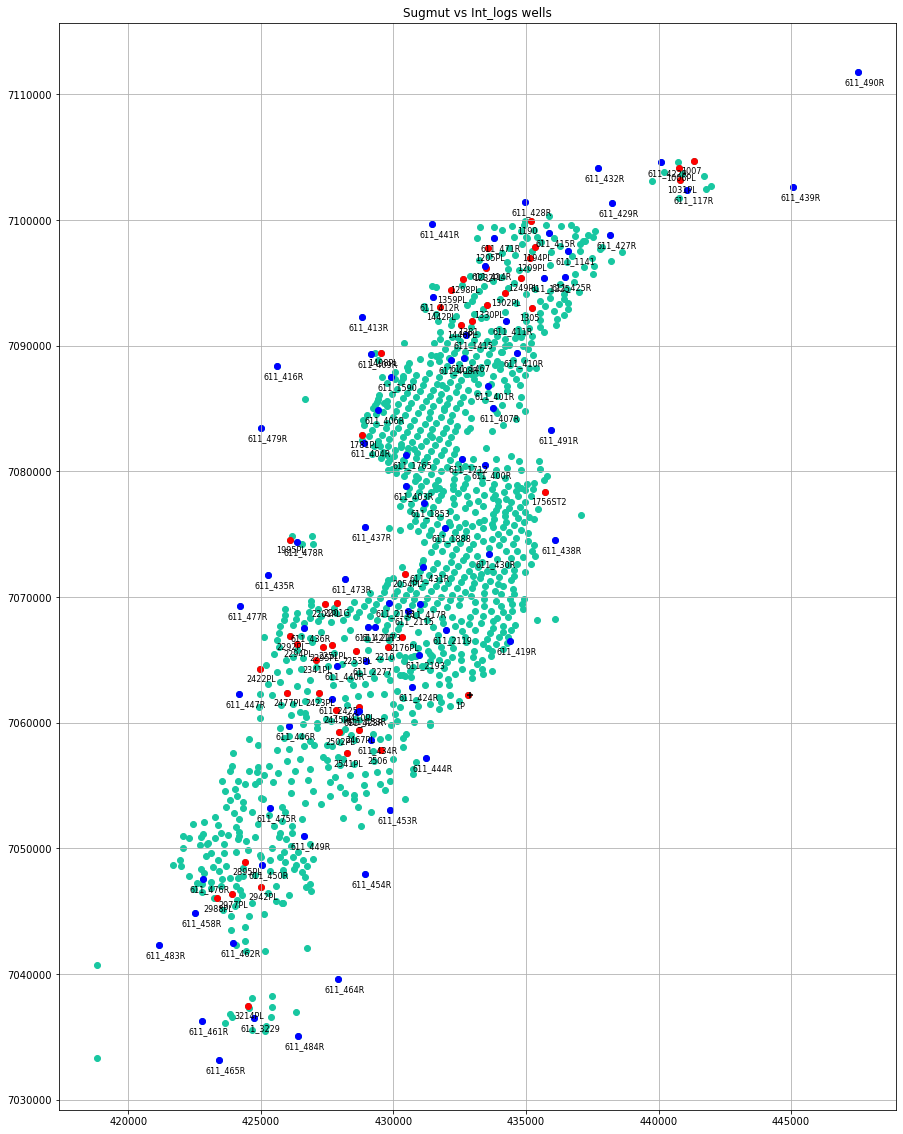

In [53]:
f, ax = plt.subplots(figsize=(15,20))
x = wi_mur_sug.bot_x
y = wi_mur_sug.bot_y
x_slb = sug_slb_coord.bot_x
y_slb = sug_slb_coord.bot_y
x_spec = 432883.24
y_spec = 7062191.89
x_core = sug_core_fes_coord.bot_x 
y_core = sug_core_fes_coord.bot_y
ax.scatter(x,y, c = '#18c7a1')
ax.scatter(x_slb, y_slb, c='red')
ax.scatter(x_spec, y_spec, c='black', marker='+')
ax.scatter(x_core, y_core, c='blue')
ax.set_title('Sugmut vs Int_logs wells')
sf = ScalarFormatter()
sf.set_powerlimits((-7, 7))
ax.yaxis.set_major_formatter(sf)
for i, name_slb in enumerate(sug_slb_coord.slb_wells):
    ax.annotate(sug_slb_coord.well[i], (x_slb[i]-500, y_slb[i]-1000), fontsize = 8)
for j, name_core in enumerate(sug_core_fes_coord.uwi_well):
    ax.annotate(sug_core_fes_coord.uwi_well[j], (x_core[j]-500, y_core[j]-1000), fontsize = 8)
ax.grid();

In [54]:
f.savefig('sug_slb.pdf')

## Data Processing

## Final Result